### BOSTON HOUSE PRICE PREDICTION

 1) Import necessary libraries <br>
 2) Load dataset <br>
 3) Understand the size of data <br>
 4) Check for any duplicate records <br>
 5) Check for any missing values  <br>
 6) Check for outliers <br>
 7) Identify important features <br>
 8) Build linear regression model <br>
 9) Evaluate the model <br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
data = pd.DataFrame(boston.data)

In [5]:
names = boston.feature_names
names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data.columns = names
data["TARGET"] = boston.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Size of the data
data.shape

(506, 14)

In [8]:
# Check for any duplicate records
data.duplicated().sum()

0

In [9]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

There are no null values

/home/nkv/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nkv/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nkv/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nkv/anacon

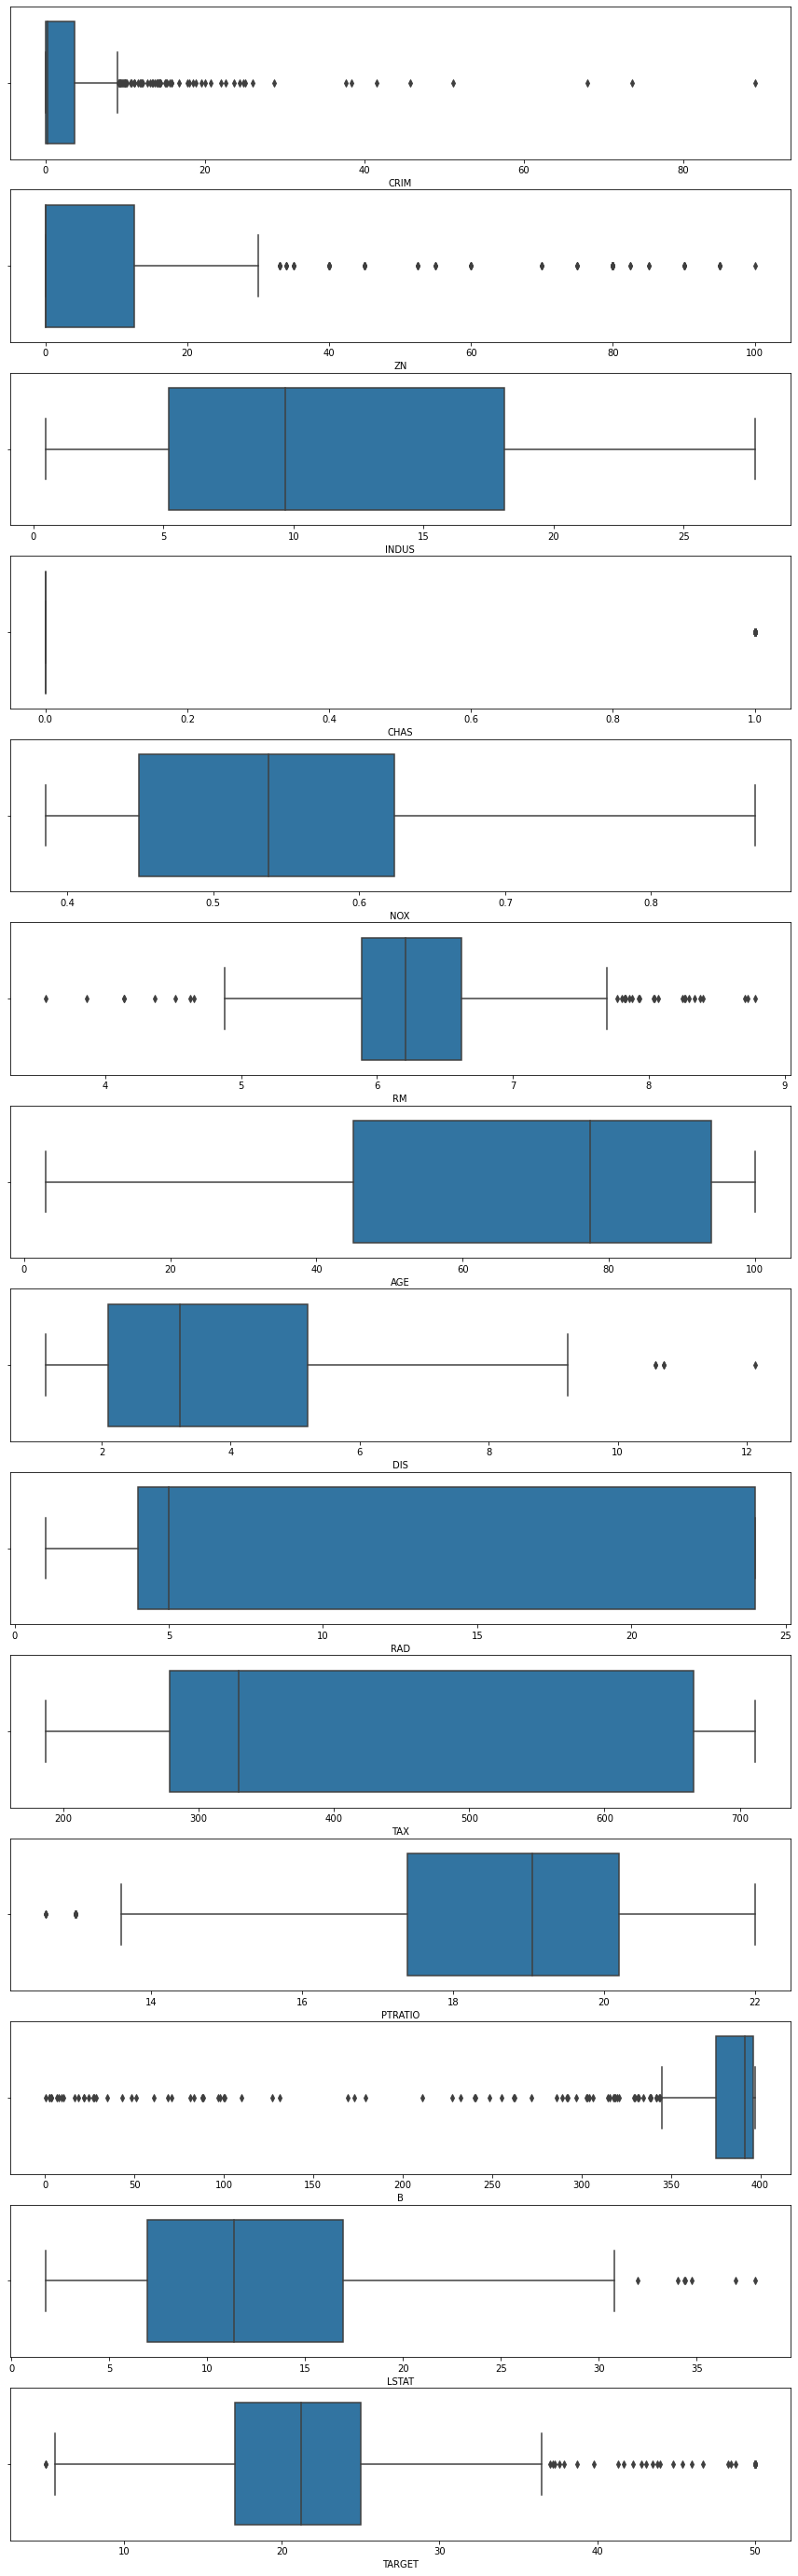

In [11]:
# Check for outliers



plt.figure(figsize = (15,50))

for i,feature in enumerate(data.columns):
    plt.subplot(14,1,i+1)
    sns.boxplot(data[feature])
    
    

There are outliers in CRIM, ZN, RM, DIS, PTRATIO,B,LSTAT and TARGET

/home/nkv/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nkv/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nkv/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

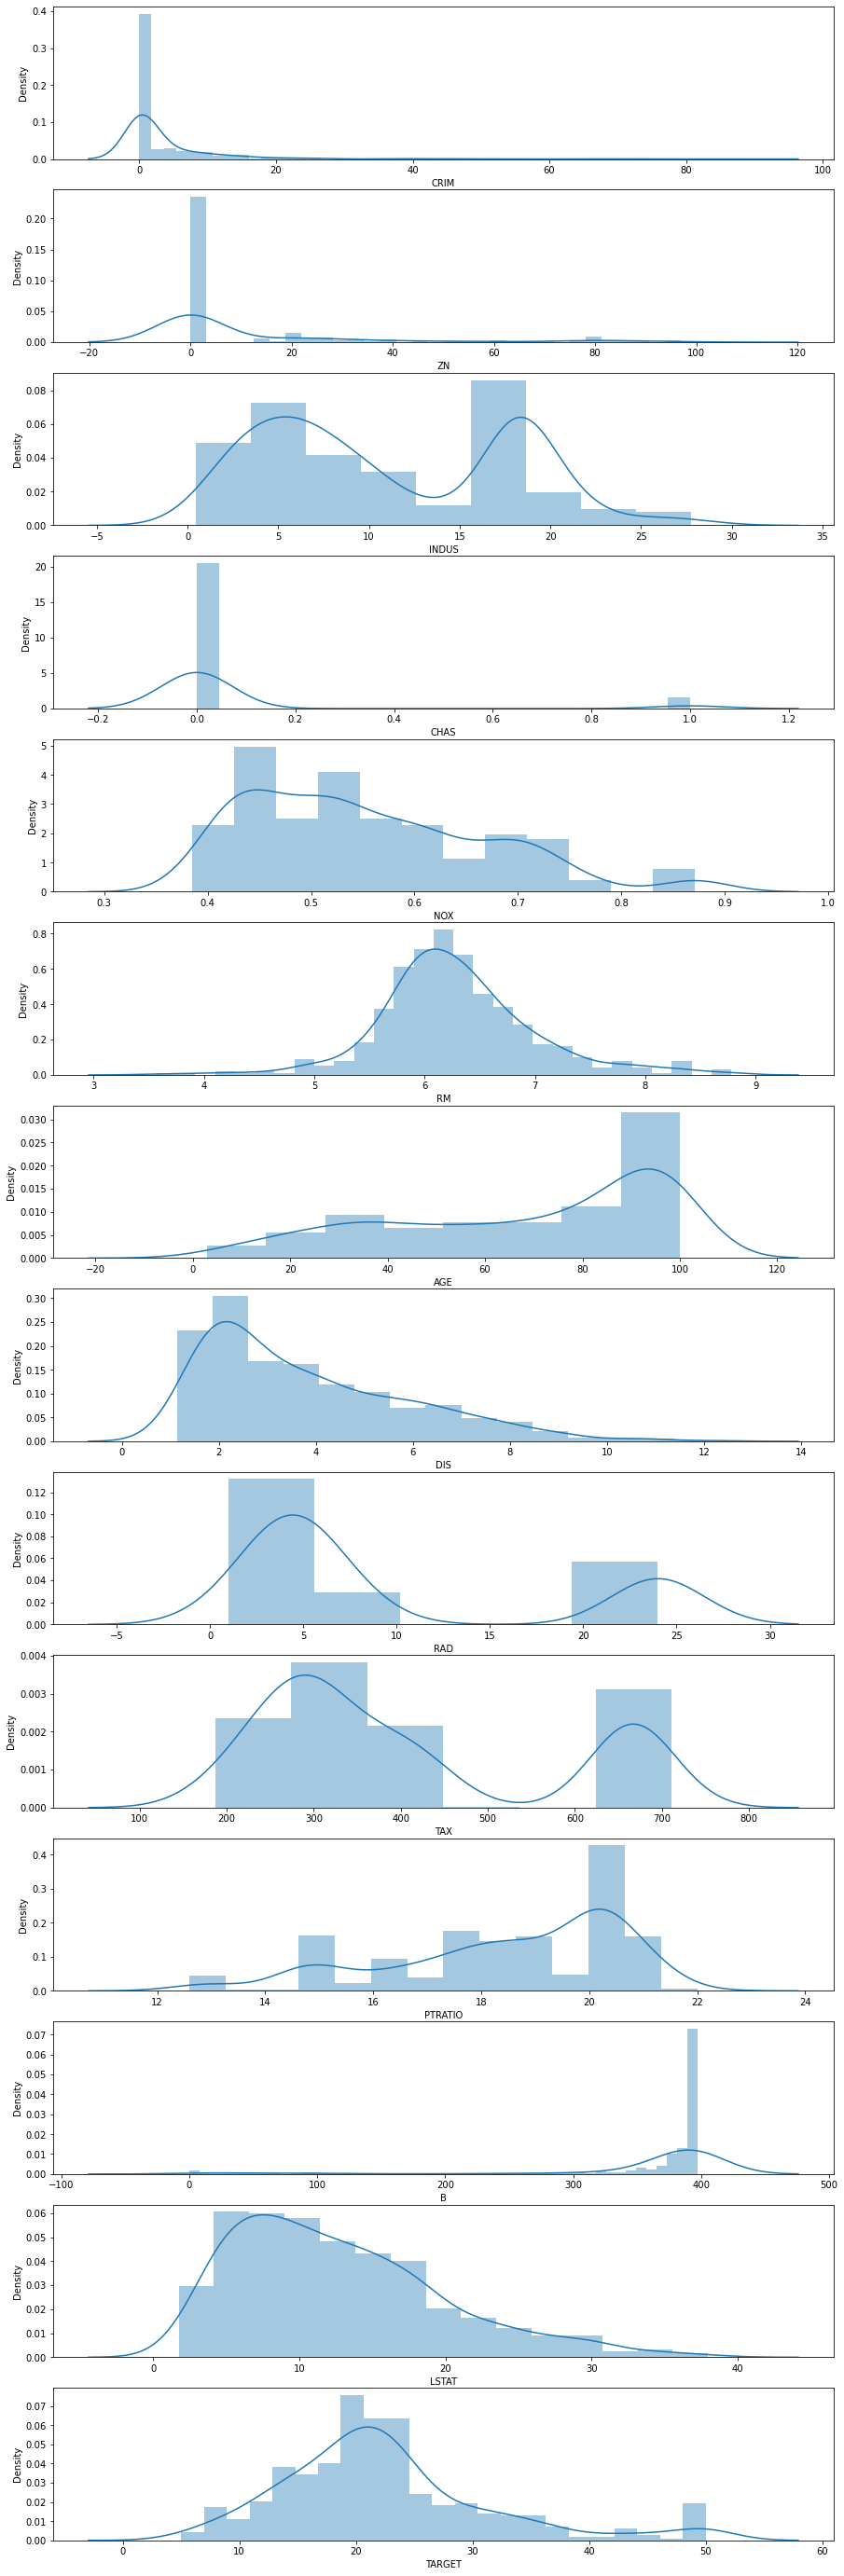

In [30]:
# Let us see the distribution of all features

plt.figure(figsize = (15,50))

for i,feature in enumerate(data.columns):
    plt.subplot(14,1,i+1)
    sns.distplot(data[feature])

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Let us see the records where TAX is >= 666


In [7]:
data_tax = data[data["TAX"] >= 666]

In [8]:
data_tax.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,137.000000,137.0,137.000000,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,12.299162,0.0,18.451825,0.058394,0.670102,6.006212,89.967883,2.05447,23.270073,667.642336,20.196350,291.039051,18.674526,16.272263
std,13.017296,0.0,1.814342,0.235348,0.061051,0.713021,12.469840,0.60790,3.764196,8.469441,0.018821,144.089867,6.873577,8.459008
min,0.105740,0.0,18.100000,0.000000,0.532000,3.561000,40.300000,1.12960,4.000000,666.000000,20.100000,0.320000,2.960000,5.000000
25%,5.441140,0.0,18.100000,0.000000,0.614000,5.683000,86.100000,1.58950,24.000000,666.000000,20.200000,210.970000,14.190000,11.000000
50%,8.716750,0.0,18.100000,0.000000,0.693000,6.152000,94.500000,1.92650,24.000000,666.000000,20.200000,374.560000,18.050000,14.300000
75%,14.236200,0.0,18.100000,0.000000,0.713000,6.411000,98.800000,2.36820,24.000000,666.000000,20.200000,395.280000,23.240000,19.900000
max,88.976200,0.0,27.740000,1.000000,0.770000,8.780000,100.000000,4.09830,24.000000,711.000000,20.200000,396.900000,37.970000,50.000000


In [15]:
### Univariate Analysis

features = ['CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

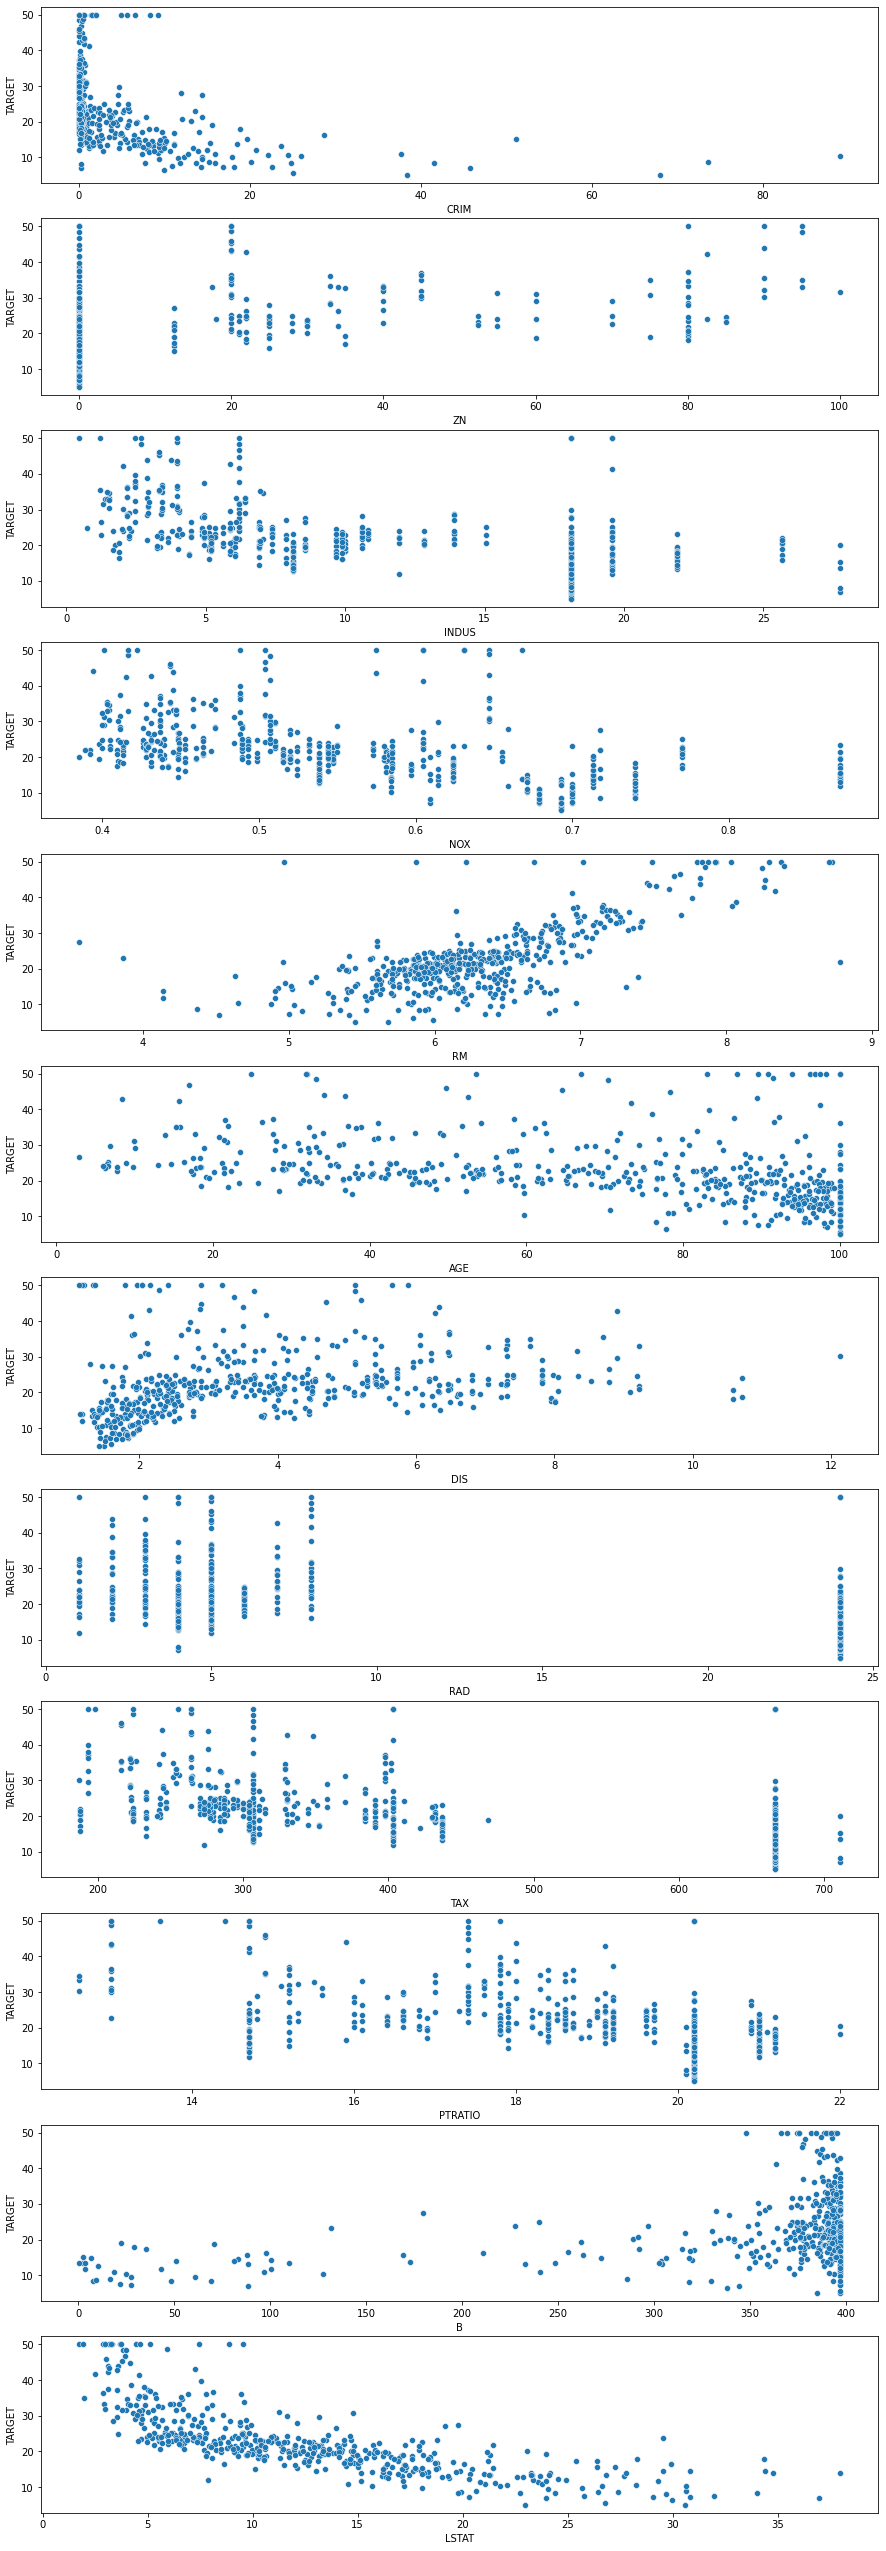

In [17]:
plt.figure(figsize = (15,50))
for i,item in enumerate(features):
    plt.subplot(13,1,i+1)
    sns.scatterplot(x = data[item], y = data["TARGET"])

1. As CRIM increases, price go down <br>
2. Price is high if ZN is high <br>
3. Price is high when there non-retail businesses are less <br>
4. Price is less in areas where NOX is high <br>
5. Price increases linearly with increase in average number of rooms <br>
6. As age increases, most of the house prices come down <br>
7. Price is higher for locations close to employment centres <br>
8. Relationship shown between tax and price is suspicious as generally tax is high when price is high. Need to investigate further. <br>



/home/nkv/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAX_impute', ylabel='Density'>

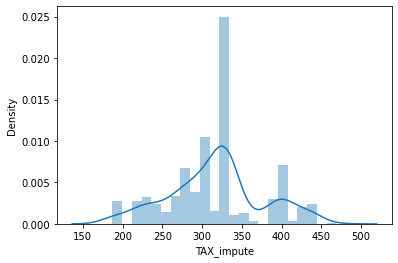

In [9]:
# Let us impute TAX values which are greater than 666 with median value

data["TAX_impute"] = np.where(data["TAX"]>= 666,data["TAX"].median(),data["TAX"])
sns.distplot(data["TAX_impute"])

<AxesSubplot:xlabel='TAX_impute', ylabel='TARGET'>

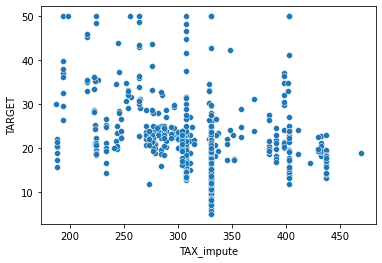

In [19]:
sns.scatterplot(x = data["TAX_impute"], y = data["TARGET"])

In [20]:
# Now, let us see why some houses have price 50

data_50 = data[data["TARGET"] == 50]
data_50.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET,TAX_impute
count,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0,16.000000
mean,2.703412,19.062500,11.860625,0.375,0.566569,7.484000,77.637500,2.586087,10.625000,415.437500,16.48125,381.743125,4.355000,50.0,310.437500
std,3.145228,35.129226,8.187944,0.500,0.089586,1.062342,26.934609,1.592896,9.415413,188.201654,2.88056,12.920621,2.321221,0.0,71.873935
min,0.013810,0.000000,0.460000,0.000,0.401000,4.970000,24.800000,1.129600,1.000000,193.000000,13.00000,347.880000,1.730000,50.0,193.000000
25%,0.409203,0.000000,3.647500,0.000,0.500000,6.932750,63.650000,1.350650,4.750000,261.750000,14.62500,375.105000,2.967500,50.0,261.750000
50%,1.491190,0.000000,18.100000,0.000,0.605000,7.853000,90.200000,2.043300,5.000000,403.000000,14.70000,386.495000,3.510000,50.0,330.000000
75%,5.091160,20.000000,18.470000,1.000,0.631000,8.099750,96.975000,2.970600,24.000000,666.000000,20.20000,390.925000,4.752500,50.0,348.250000
max,9.232300,95.000000,19.580000,1.000,0.668000,8.725000,100.000000,5.885000,24.000000,666.000000,20.20000,395.520000,9.530000,50.0,403.000000


Even though price is 50, age of house varies from 25 to 100, average number of rooms vary from 5 to 9 and so on.

So,let us impute those values with median price.

<AxesSubplot:ylabel='Frequency'>

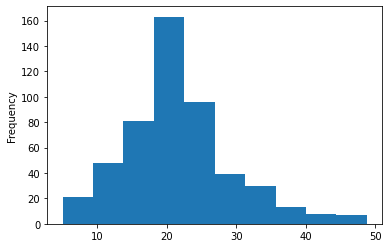

In [10]:
data["TARGET_impute"] = np.where(data["TARGET"] == 50,data["TARGET"].median(),data["TARGET"])
data["TARGET_impute"].plot(kind = 'hist')

In [11]:
# Let us create a new dataset with imputed features

data_impute = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
data_impute["TAX"] = data["TAX_impute"]
data_impute["TARGET"] = data["TARGET_impute"]
#data_impute["TARGET"] = data["TARGET"]

<ipython-input-11-f2a8a8d5c257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_impute["TAX"] = data["TAX_impute"]
<ipython-input-11-f2a8a8d5c257>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_impute["TARGET"] = data["TARGET_impute"]


In [13]:
# Now, let us see the correlation

data_impute.shape

(506, 14)

In [14]:
data_impute.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,296.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,242.0,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,242.0,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,222.0,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,222.0,36.2


In [16]:
data_impute.to_csv("boston_EDA.csv",index = False)

<AxesSubplot:>

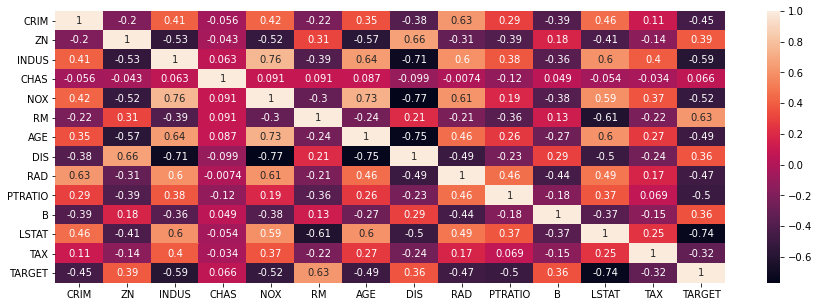

In [17]:
# Now, let us find the correlation
plt.figure(figsize = (15,5))
cor = data_impute.corr()
sns.heatmap(cor,annot = True)

In [25]:
# Let us select feature with correlation of 0.5

cor.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX,TARGET
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,1.000000,-0.177383,0.374044,0.069066,-0.495867
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.177383,1.000000,-0.366087,-0.153758,0.363861
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.374044,-0.366087,1.000000,0.245042,-0.739534
TAX,0.108680,-0.143445,0.396920,-0.034370,0.369428,-0.216518,0.268141,-0.244951,0.172017,0.069066,-0.153758,0.245042,1.000000,-0.321424
TARGET,-0.448927,0.389381,-0.587223,0.066303,-0.519841,0.625020,-0.485869,0.364661,-0.468028,-0.495867,0.363861,-0.739534,-0.321424,1.000000


In [26]:
sel = []
for i in range(0,13):
    if (cor.iloc[-1,i] >= 0.6) or (cor.iloc[-1,i] <= -0.6):
        sel.append(cor.columns[i])
        
    
sel

['RM', 'LSTAT']

In [27]:
#sns.regplot(y = 1/(data_impute["INDUS"]), x = data_impute["TARGET"] )

Let us see the relationship between the selected features and price
plt.figure(figsize = (8,8))
for i,items in enumerate(sel):
    plt.subplot(len(sel),1,i+1)
    sns.regplot(y = data_impute[items], x = data_impute["TARGET"])
    plt.title(items)

### Let us check for multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
x_vif = data_impute[sel]
vif_data = pd.DataFrame()
vif_data["feature"] = x_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(len(x_vif.columns))]

In [30]:
vif_data


,feature,VIF
0,RM,3.253351
1,LSTAT,3.253351


In [31]:
vif_data.feature

0       RM
1    LSTAT
Name: feature, dtype: object

In [32]:
# Let us select CRIM,INDUS,RM,RAD and LSTAT
select = []
for i in range(len(vif_data.feature)):
    if vif_data.iloc[i,-1] < 10:
        select.append(vif_data.iloc[i,0])
select

['RM', 'LSTAT']

In [33]:
X = data_impute[select]
#X["INDUS"] = 1/X["INDUS"]
Y = data_impute["TARGET"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=99)

In [34]:
# Let us do feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)

In [35]:
x_test_scale = scaler.fit_transform(x_test)

In [36]:
lr = LinearRegression()
lr.fit(x_train_scale,y_train)

LinearRegression()

In [37]:
y_test_pred = lr.predict(x_test_scale)

In [38]:
y_train_pred = lr.predict(x_train_scale)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
mean_squared_error(y_train,y_train_pred )

24.476178935403986

In [41]:
mean_squared_error(y_test,y_test_pred )

23.420553352571897

<AxesSubplot:xlabel='TARGET', ylabel='Density'>

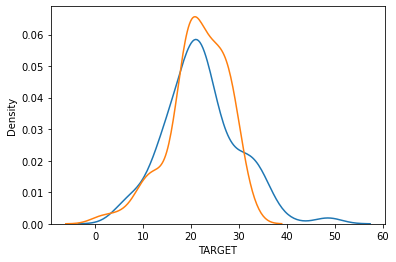

In [42]:
sns.kdeplot(y_test)
sns.kdeplot(y_test_pred)

<AxesSubplot:xlabel='TARGET', ylabel='Density'>

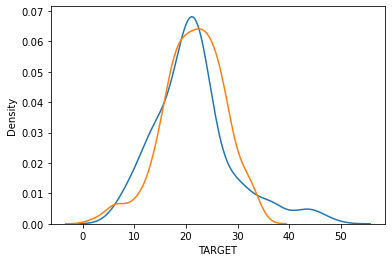

In [43]:
sns.kdeplot(y_train,legend = True)
sns.kdeplot(y_train_pred)

In [44]:
import pickle


with open("boston_lr.pickle","wb") as output:
    pickle.dump(lr,output)

In [45]:
with open("scaler.pickle","wb") as output:
    pickle.dump(scaler,output)

In [47]:
with open("scaler.pickle","rb") as output:
   scaler1 =  pickle.load(output)

In [59]:
test = scaler1.transform([[7.147,5.33]])

In [49]:
with open("boston_lr.pickle","rb") as output:
   lr1 =  pickle.load(output)

In [60]:
lr1.predict(test)

array([28.32364094])